In [3]:
import cv2
import numpy as np

image = cv2.imread('./images/input.jpg')
# I just resized the image to a quarter of its original size
image = cv2.resize(image, (0, 0), None, .25, .25)

grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Make the grey scale image have three channels
grey_3_channel = cv2.cvtColor(grey, cv2.COLOR_GRAY2BGR)

numpy_vertical = np.vstack((image, grey_3_channel))
numpy_horizontal = np.hstack((image, grey_3_channel))

numpy_vertical_concat = np.concatenate((image, grey_3_channel), axis=0)
numpy_horizontal_concat = np.concatenate((image, grey_3_channel), axis=1)

cv2.imshow('Main', image)
cv2.imshow('Numpy Vertical', numpy_vertical)
cv2.imshow('Numpy Horizontal', numpy_horizontal)
cv2.imshow('Numpy Vertical Concat', numpy_vertical_concat)
cv2.imshow('Numpy Horizontal Concat', numpy_horizontal_concat)

cv2.waitKey()

-1

In [39]:
import cv2
 
img = cv2.imread('./images/input.jpg', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()
 

Original Dimensions :  (830, 1245, 3)
Resized Dimensions :  (498, 747, 3)


In [ ]:
#error code
import numpy as np
import cv2

names = ['first.avi', 'second.avi', 'third.avi', 'fourth.avi'];
window_titles = ['first', 'second', 'third', 'fourth']


cap = [cv2.VideoCapture(i) for i in names]

frames = [None] * len(names);
gray = [None] * len(names);
ret = [None] * len(names);

while True:

    for i,c in enumerate(cap):
        if c is not None:
            ret[i], frames[i] = c.read();


    for i,f in enumerate(frames):
        if ret[i] is True:
            gray[i] = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
            cv2.imshow(window_titles[i], gray[i]);

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


for c in cap:
    if c is not None:
        c.release();

cv2.destroyAllWindows()

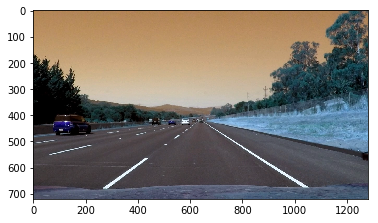

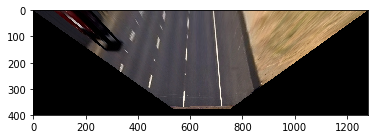

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_H = 400
IMAGE_W = 1280

src = np.float32([[0, IMAGE_H], [1207, IMAGE_H], [0, 0], [IMAGE_W, 0]])
dst = np.float32([[569, IMAGE_H], [711, IMAGE_H], [0, 0], [IMAGE_W, 0]])
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

img = cv2.imread('./images/test_img.jpg') # Read the test img
plt.imshow(img)
plt.show()
img = img[450:(450+IMAGE_H), 0:IMAGE_W] # Apply np slicing for ROI crop
warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H)) # Image warping
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB)) # Show results
plt.show()

In [2]:
import numpy as np
import cv2 as cv
img = cv.imread('./images/input.jpg',0)
img = cv.resize(img,None,fx=1/2, fy=1/2)#, interpolation = cv.INTER_CUBIC)
rows,cols = img.shape
M = np.float32([[1,0,50],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [2]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
 
while(True):
    ret, frame = cap.read()
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [42]:
import cv2
import numpy as np

def sketch(img):
    IMAGE_H = 500
    IMAGE_W = 630

    src = np.float32([[0, IMAGE_H], [1207, IMAGE_H], [0, 0], [IMAGE_W, 0]])
    dst = np.float32([[300, IMAGE_H], [500, IMAGE_H], [0, 0], [IMAGE_W, 0]])
    M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
    Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

    img = img[450:(450+IMAGE_H), 0:IMAGE_W] # Apply np slicing for ROI crop
    warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H)) # Image warping  
    return warped_img
def sketch1(img1):
    IMAGE_H = 500
    IMAGE_W = 630

    src = np.float32([[0, IMAGE_H], [1200, IMAGE_H], [0, 0], [IMAGE_W, 0]])
    dst = np.float32([[300, IMAGE_H], [500, IMAGE_H], [0, 0], [IMAGE_W, 0]])
    M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
    Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

    img1 = img1[450:(450+IMAGE_H), 0:IMAGE_W] # Apply np slicing for ROI crop
    warped_img1 = cv2.warpPerspective(img1, M, (IMAGE_W, IMAGE_H)) # Image warping  
    return warped_img1
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    #cv2.imshow('frame',frame)
    cv2.imshow('Our Live Sketcher', sketch(frame))
    cv2.imshow('Our Live Sketcher1', sketch1(frame))
    if cv2.waitKey(1) == 13:
        break
        
cap.release()
cv2.destroyAllWindows()  

In [5]:
import numpy as np
import cv2 as cv
img = cv.imread('./images/input.jpg',0)
rows,cols = img.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [41]:
import cv2
import numpy as np
def resize(img):
    IMAGE_H = 500
    IMAGE_W = 630

    dim = (IMAGE_W, IMAGE_H)
    # resize image
    resized = cv2.resize(img, dim)
    return resized
def loca(img):
    rotated_image = cv2.transpose(img)
    return rotated_image

def sketch(img):
    IMAGE_H = 500
    IMAGE_W = 630
    
    src = np.float32([[0, IMAGE_H], [1207, IMAGE_H], [0, 0], [IMAGE_W, 0]])
    dst = np.float32([[300, IMAGE_H], [500, IMAGE_H], [0, 0], [IMAGE_W, 0]])
    M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
    Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

    #img = cv2.imread('./images/input.jpg') 
    img = img[450:(450+IMAGE_H), 0:IMAGE_W] # Apply np slicing for ROI crop
    warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H)) # Image warping  
    return warped_img

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    img = sketch(frame)
    img1 = loca(frame)
    img1 = resize(img1)
    #print('Resized Dimensions : ',img.shape)
    #print('Resized Dimensions : ',img1.shape)
    frame = cv2.add(img1,img)
    cv2.imshow('Our Live Sketcher', frame)    
    if cv2.waitKey(1) == 13:
        break
        
cap.release()
cv2.destroyAllWindows()  